In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import tailor
from tailor.clustering import rank_features
from tailor.clustering import distance
from tailor.data import group_by
from tailor.visualization import plot_article_history, plot_feature_history

In [3]:
df = tailor.load_data()

In [4]:
feats = ['color', 'brand', 'Abteilung', 'WHG', 'WUG', 'season']

r_feats = rank_features(df, distance.euclidean, feats, 'article_count')
print(r_feats)

Abteilung    1.098196
brand        0.256130
WHG          0.250199
season       0.199529
WUG          0.132761
color        0.059410
dtype: float64


Abteilung


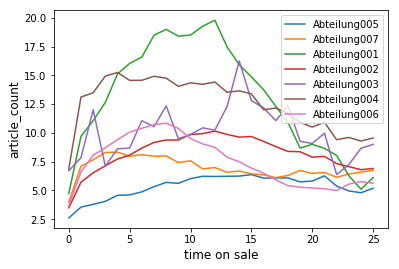

In [5]:
feat = r_feats.index[0]
print(feat)
plot_feature_history(df, feat, 'article_count');

In [6]:
df_f = group_by.feature(df, feat)
df_f

,Abteilung,time_on_sale,original_price,sells_price,discount,markdown,article_count,stock_total,avq,revenue
0,Abteilung005,0,64.266279,62.632858,1.628886,0.004535,2.609950,1406.424419,0.651260,142.717334
1,Abteilung005,1,64.686777,63.280696,1.346549,0.059531,3.547582,1438.909147,2.004025,196.775852
2,Abteilung005,2,64.405046,62.937726,1.373538,0.093782,3.785395,1407.236697,3.562035,211.031417
3,Abteilung005,3,64.569464,62.616309,1.707365,0.245789,4.054044,1434.111042,5.138298,223.716883
4,Abteilung005,4,63.469816,60.524982,2.490292,0.454542,4.572443,1529.461229,6.815898,238.335677
5,Abteilung005,5,64.417069,61.677170,1.931339,0.808560,4.611167,1431.938369,8.868589,249.631826
6,Abteilung005,6,64.799125,61.077134,2.398673,1.323318,4.878288,1402.859384,10.926033,261.527229
7,Abteilung005,7,64.262576,60.179475,2.101983,1.981118,5.327185,1433.396215,13.174443,280.423046
8,Abteilung005,8,64.028736,58.997108,2.521803,2.509825,5.698155,1519.201149,15.119964,285.363100
9,Abteilung005,9,64.220286,58.197666,2.496293,3.526327,5.616964,1403.670753,17.926338,281.637533


### Each characteristic forms a cluster

In [7]:
df_f['cluster'] = df_f[feat].cat.codes

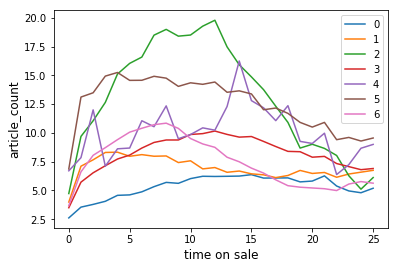

In [8]:
plot_feature_history(df_f, 'cluster', 'article_count');

### Calculate distance between clusters

In [9]:
def cluster_distances(df, distance_target):
    cluster = df_f.cluster.unique()
    l = []
    for i, x in enumerate(cluster):
        x_curve = df_f.loc[df_f.cluster == x].set_index('time_on_sale')

        for k, y in enumerate(cluster):
            if k <= i:
                continue

            y_curve = df_f.loc[df_f.cluster == y].set_index('time_on_sale')
            d = distance.euclidean(
                x_curve[distance_target], y_curve[distance_target])
            l.append((x, y, d))

    return pd.DataFrame(l, columns=['from', 'to','cluster_distance'])

distances = cluster_distances(df_f, 'article_count')

### Find out characteristics to cluster together

In [10]:
# Fix threshold value
threshold = distances.cluster_distance.mean()/2
print(threshold)
df_t = distances.loc[distances.cluster_distance < threshold]
df_t

1.9147327639483753


,from,to,cluster_distance
0,0,1,1.616583
7,1,3,1.628530
10,1,6,1.286741
17,3,6,1.788136


In [11]:
to_cluster = df_t.loc[df_t.cluster_distance == df_t.cluster_distance.min()]

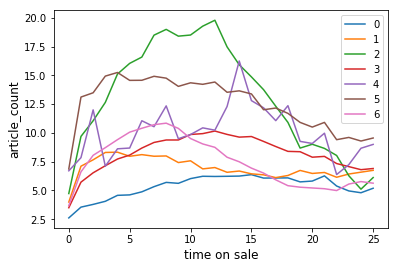

In [12]:
plot_feature_history(df_f, 'cluster', 'article_count');

### Reassign characteristic cluster

In [13]:
df_f.loc[df_f.cluster == to_cluster['to'].values[0], 'cluster'] = to_cluster['from'].values[0]

In [14]:
df_c = group_by.feature(df_f, 'cluster')

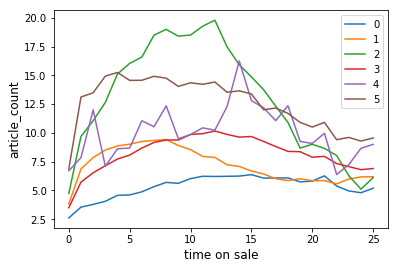

In [15]:
plot_feature_history(df_c, 'cluster', 'article_count');


In [16]:
distances = cluster_distances(df_f, 'article_count')
# Fix threshold value
threshold = distances.cluster_distance.mean()/2
print(threshold)
df_t = distances.loc[distances.cluster_distance < threshold]
df_t

2.0374172418620753


,from,to,cluster_distance
0,0,1,2.007160
6,1,3,1.708333
12,3,4,1.932808
